<a href="https://colab.research.google.com/github/itsabhiraj/Churn-Prediction-Model/blob/main/EDA_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_excel("E_Commerce_Dataset.xlsx", sheet_name="E Comm")

In [40]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [41]:
data.shape

(5630, 20)

In [42]:
data.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [43]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [45]:
data.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [46]:
data.duplicated().sum()

0

In [47]:
data.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [48]:
data.drop(columns='CustomerID', inplace=True)

In [49]:
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [50]:
data.columns = data.columns.str.lower()
data.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [51]:
count_col = []
hist_col = []
for col in data.columns:
    if data[col].nunique() <= 20:
        count_col.append(col)
    else:
        hist_col.append(col)

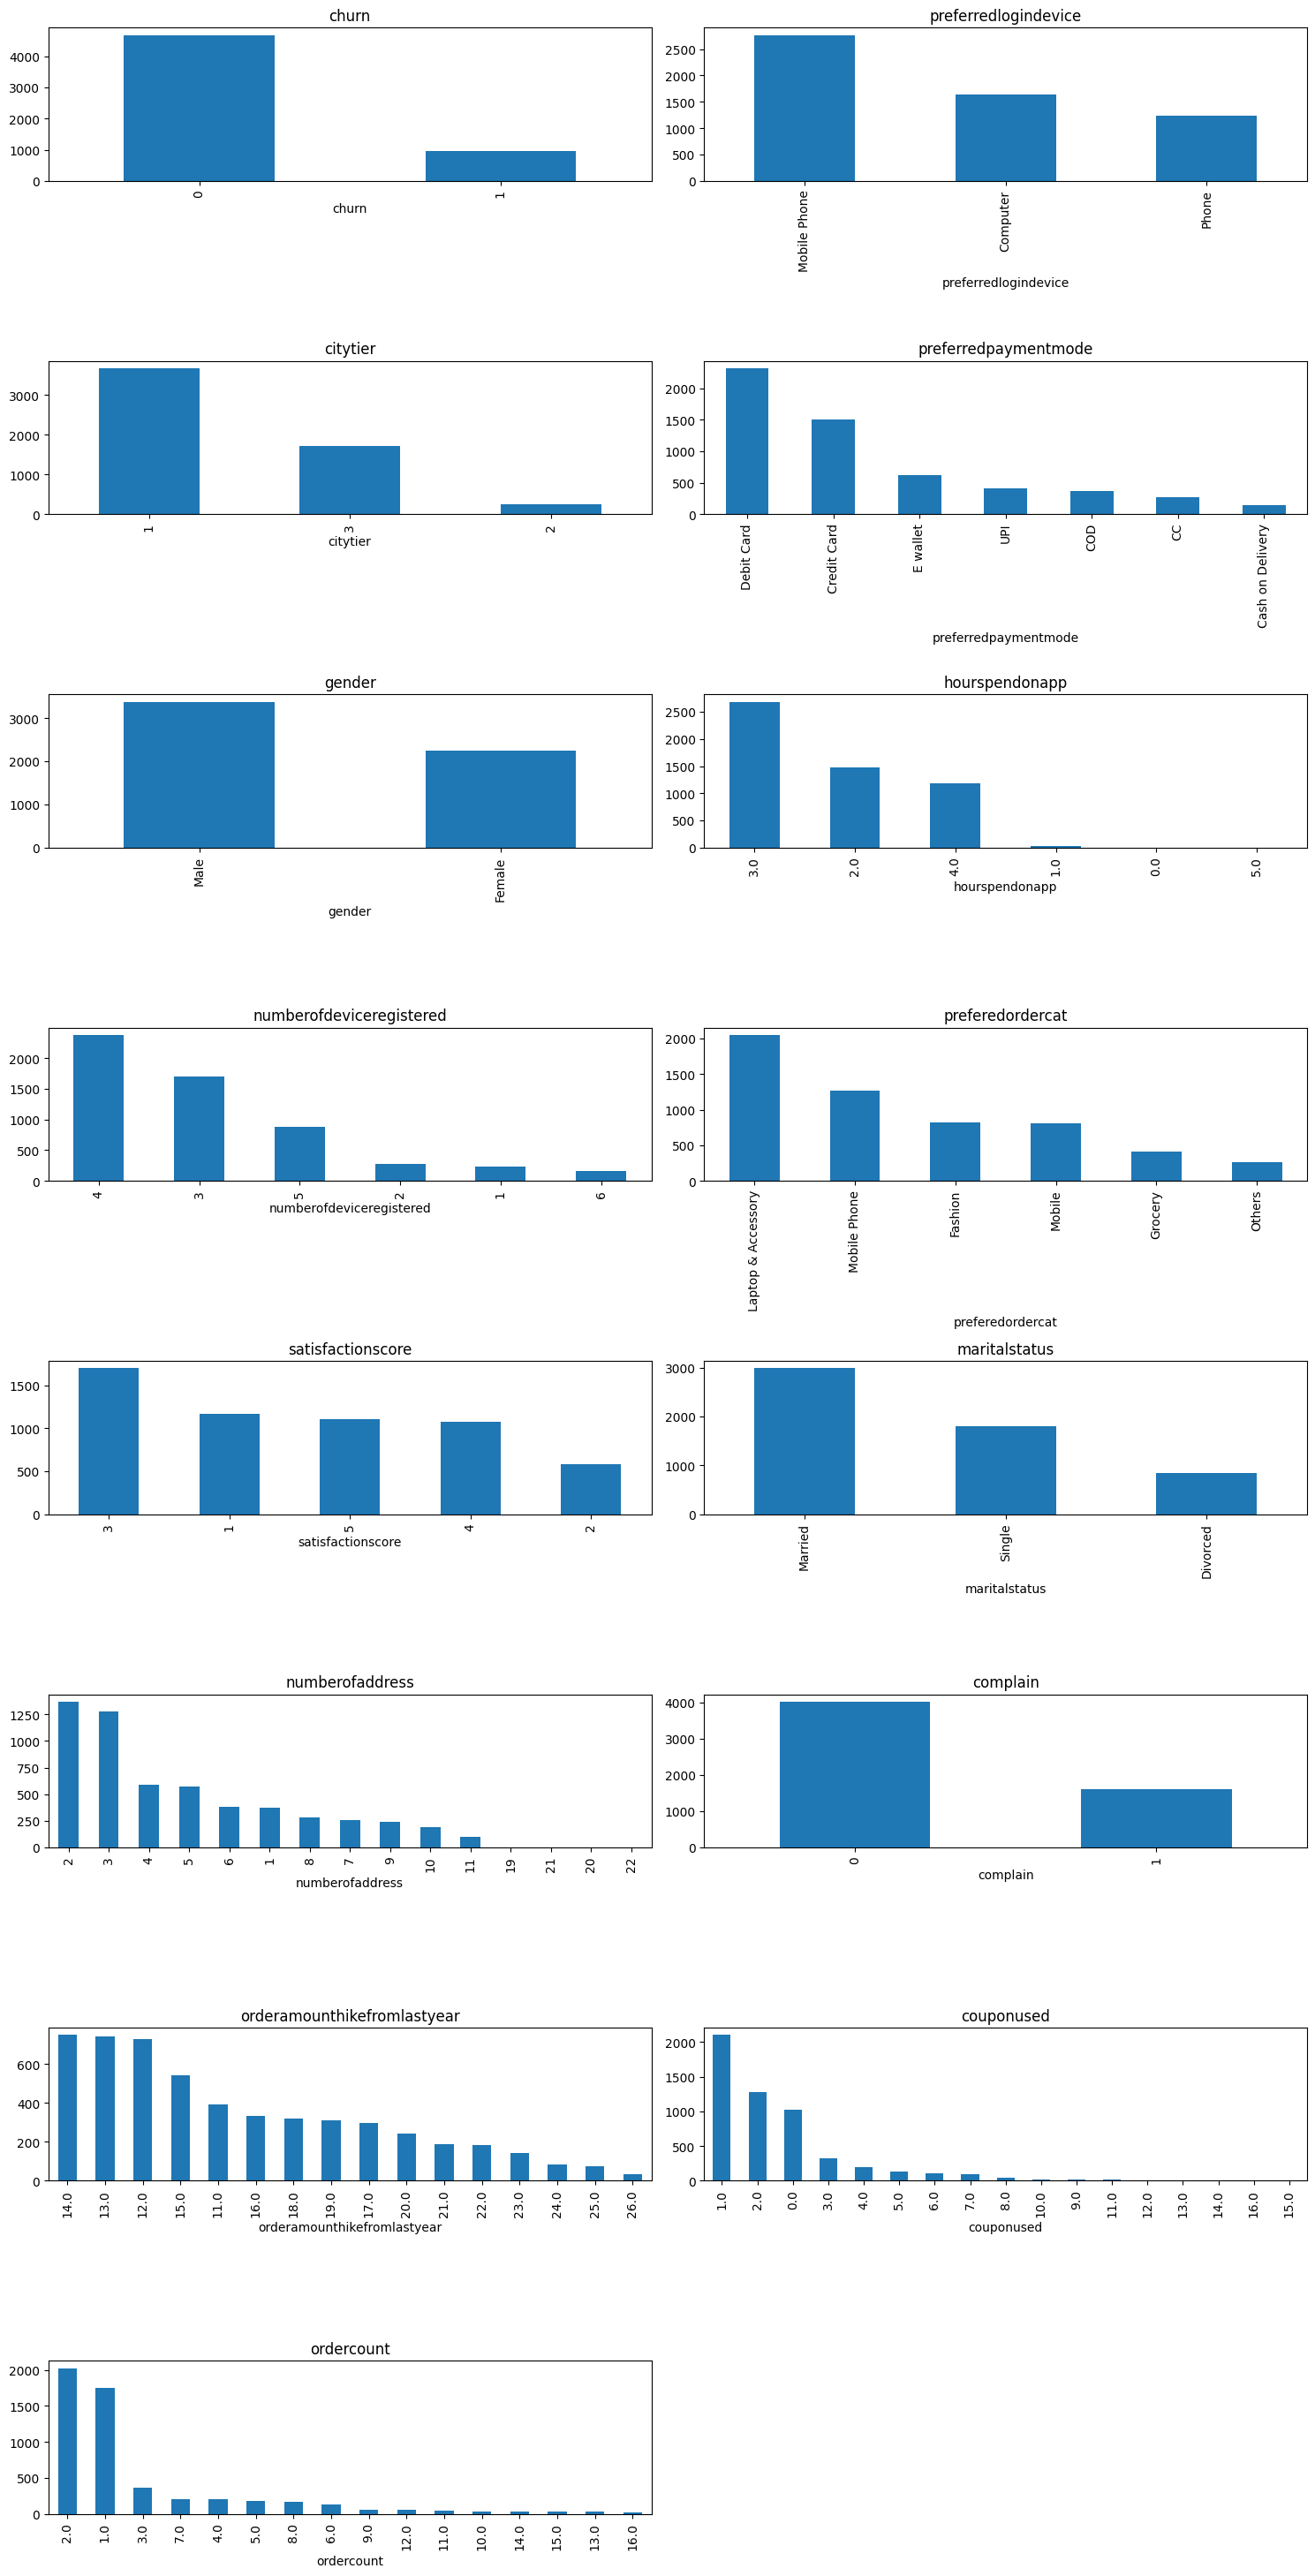

In [52]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(11,2,plot_num)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plot_num += 1
plt.tight_layout()

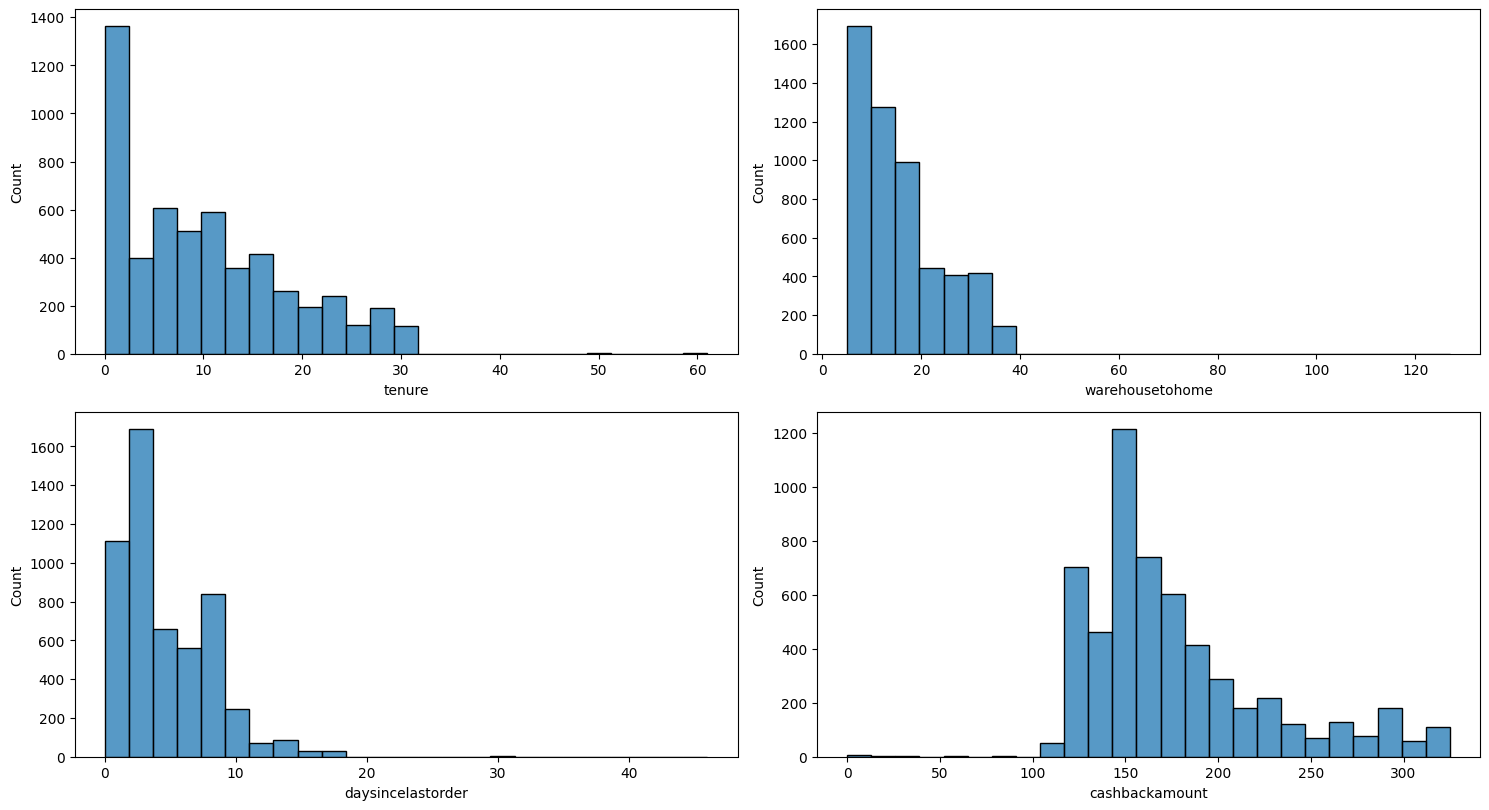

In [53]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=data, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

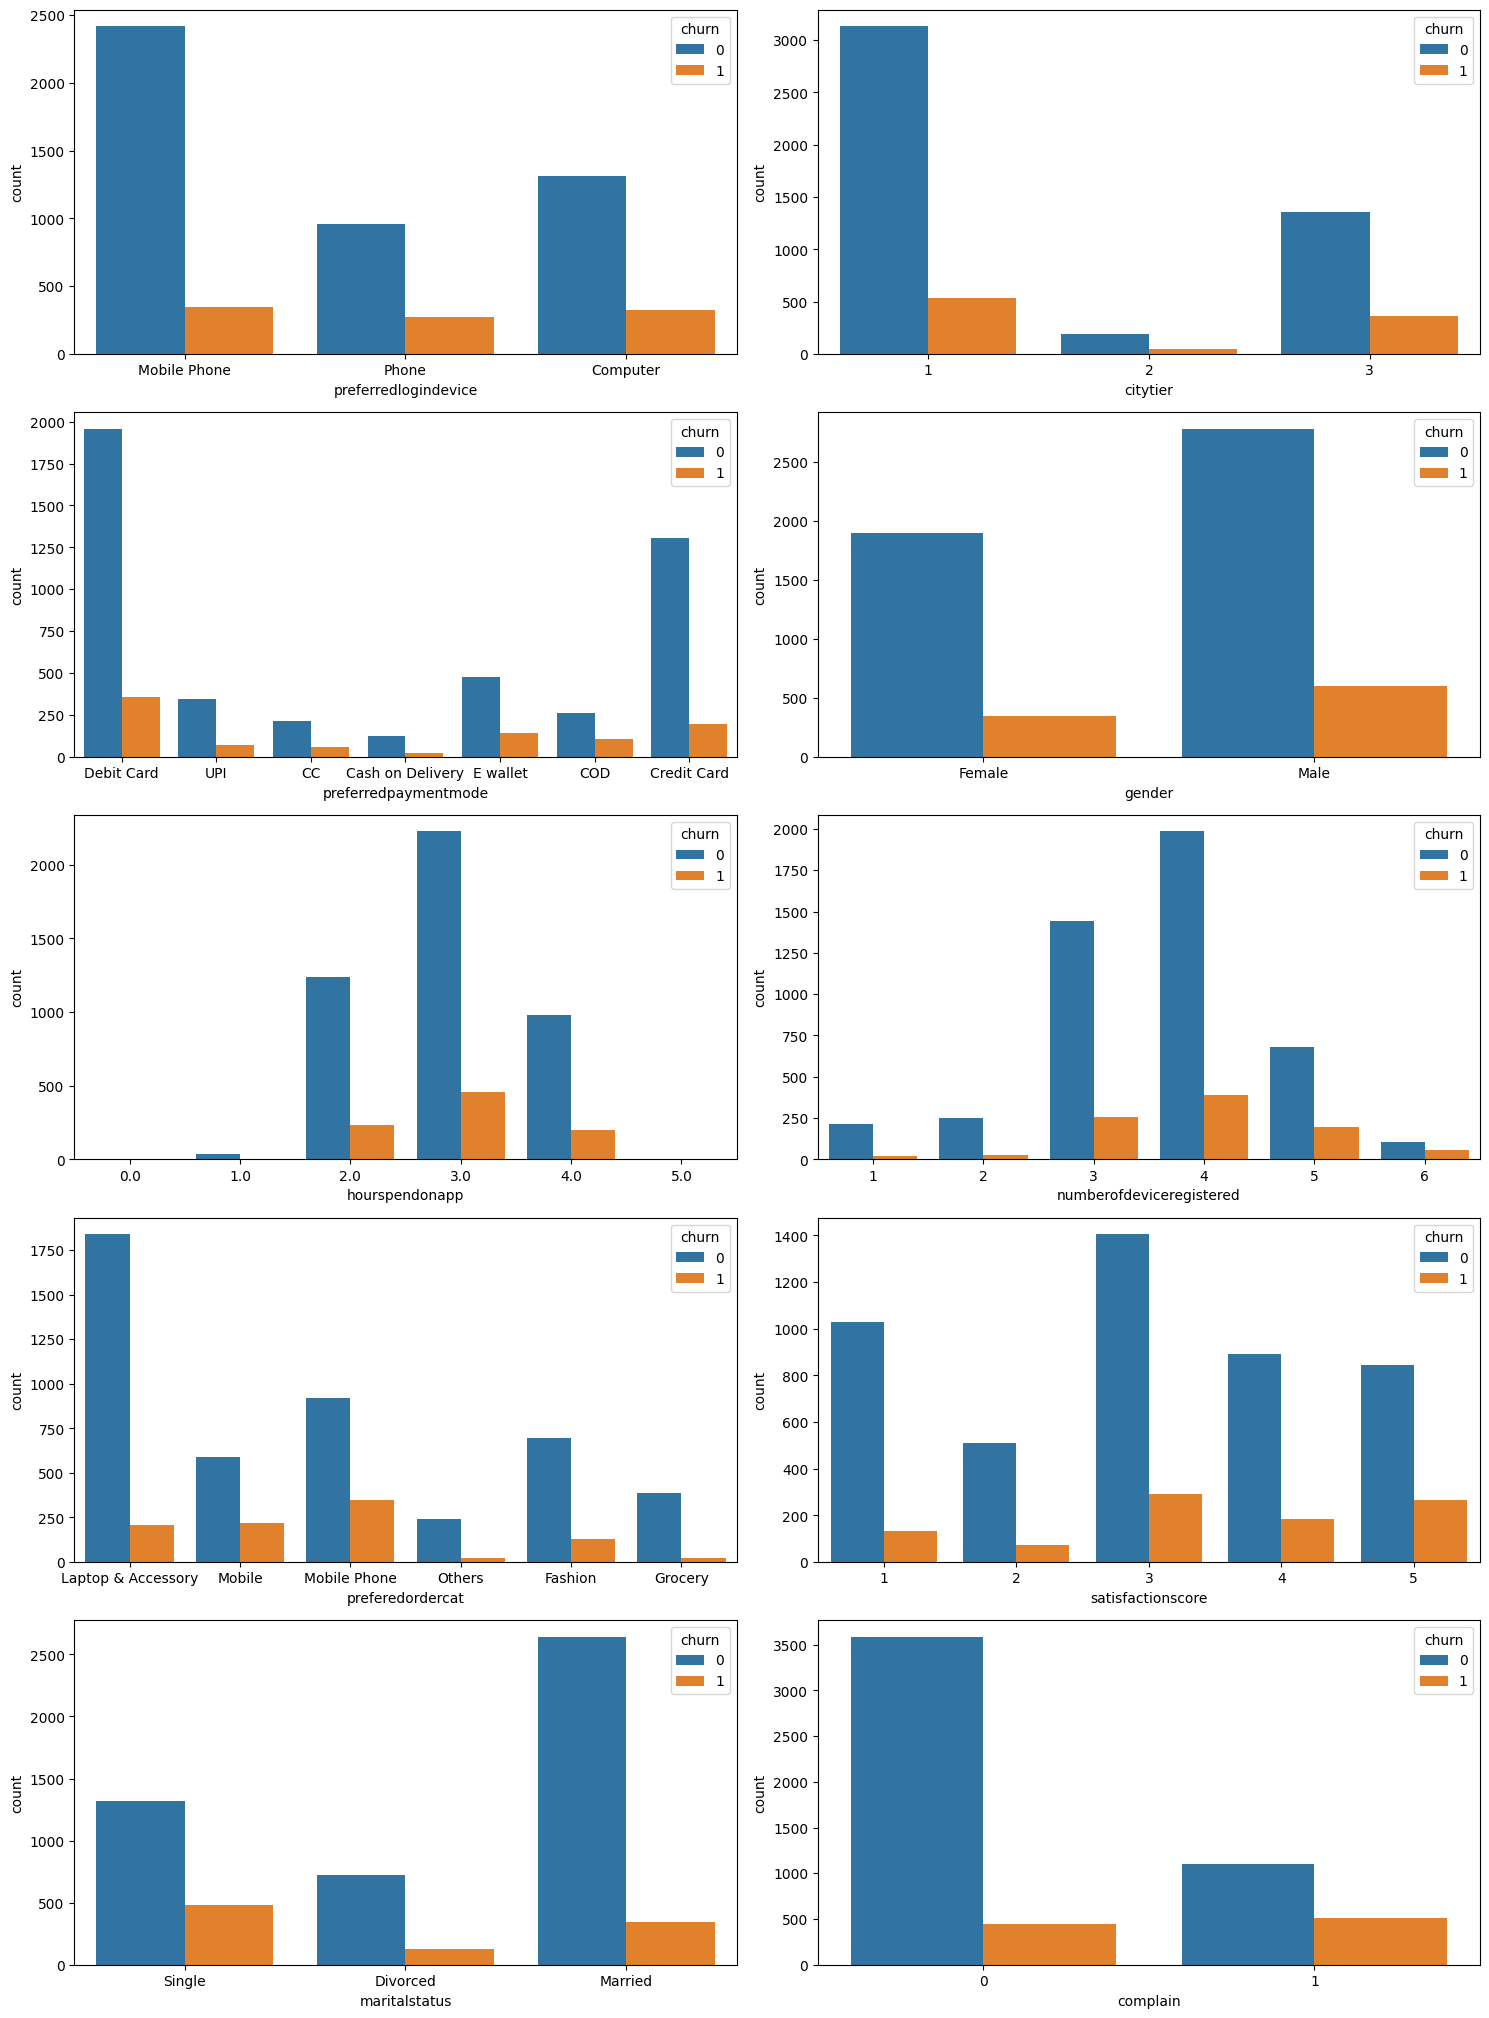

In [54]:
plt.figure(figsize=(15,40))
plot_num=1
for col in count_col:
  if data[col].nunique() <=8 and col!="churn":
    plt.subplot(10,2,plot_num)
    sns.countplot(data=data,x=col,hue='churn')
    plot_num+=1
plt.tight_layout()

Imputing missing values

In [57]:
def fill_na_values(data, random_state=None):

  numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
  categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

  numeric_imputer = SimpleImputer(strategy='mean')
  data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

  # Create a copy of the DataFrame to avoid modifying the original DataFrame
  encoded_data = data.copy()

  for col in categorical_cols:
    if data[col].dtype == 'object':

      encoded_cols = pd.get_dummies(data[col], prefix=col)
      # Concatenate the encoded columns to the copied DataFrame
      encoded_data = pd.concat([encoded_data.drop(col, axis=1), encoded_cols], axis=1)

  # Apply IterativeImputer to the encoded DataFrame
  rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
  encoded_data = pd.DataFrame(rf_imputer.fit_transform(encoded_data), columns=encoded_data.columns)


  return encoded_data # Return the encoded and imputed data

data = fill_na_values(data, random_state=42)

In [58]:
data.head()

,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,...,gender_Male,preferedordercat_Fashion,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Mobile Phone,preferedordercat_Others,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [59]:
x=data.drop(columns='churn')
y=data['churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

smote = SMOTE(sampling_strategy=1, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_resampled==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_resampled==1)))

Before upsampling count of label 0 3741
Before upsampling count of label 1 763
After upsampling count of label 0 3741
After upsampling count of label 1 3741


In [62]:
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [63]:
#Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

Model Evaluation

In [65]:
scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, x, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
7,XGBClassifier,99.300000,98.200000,97.600000,97.900000
3,RandomForestClassifier,98.400000,98.900000,91.600000,95.100000
1,BaggingClassifier,98.000000,97.000000,91.000000,93.900000
2,GradientBoostingClassifier,91.900000,85.200000,62.800000,72.200000
0,AdaBoostClassifier,89.800000,75.800000,58.200000,65.800000
4,LogisticRegressionCV,89.300000,77.800000,51.100000,61.600000
6,KNeighborsClassifier,87.500000,70.400000,44.800000,54.800000
5,RidgeClassifierCV,87.400000,86.500000,29.700000,44.300000


In [67]:
final_model=XGBClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)

final_model.score(x_test, y_test)

0.9831261101243339

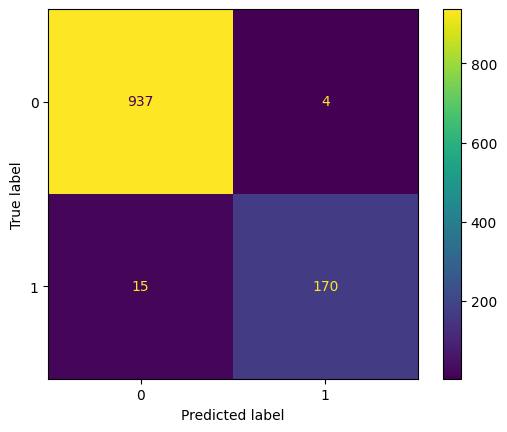

In [68]:
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [70]:
import pickle
pickle.dump(final_model,open('churn_prediction_model.pkl','wb'))

#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in x.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))